In [28]:
from IPython.display import HTML
HTML('<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/Youtube_2018.gif">')

# Analiza YouTube trendova

   Platforma YouTube, s kojom smo vjerojatno svi dobro poznati (pogotovo kada treba naučiti puno toga u malo vremena), vodi dnevnu evidenciju o videima na Trending Pageu. Kako YouTube odlučuje koji videi će biti taj dan na Tranding Pageu? Sigurno postoji kompleksan algoritam na koji utječe mnogo faktora.

Mi ćemo u ovom eseju proučavati moguće korelacije između broja viewova, likeova, dislikeova i broja komentara na videima koji su bili na Tranding Pageu. Također, bavit ćemo se proučavanjem početcima jednih od najvećih neslužbenih *natjecanja* na YouTubeu, PewDiePie vs. T-Series. Dva velika kanala koja su se borila za prvo mjesto po broju pretplatnika, no više o ovoj zanimljivoj *borbi* nešto kasnije.

Trending Page se razlikuje od države do države. U nastavku ćemo učitati i analizirati podatke iz Velike Britanije (GB), Indije (IN) i Francuske (FR). Podaci su iz 2017. i 2018. godine.

In [1]:
import pandas as pd
podaciGB = pd.read_csv('GBvideos.csv', encoding = 'utf-8')
podaciGB.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


Ovaj dataset je dosta velik sam po sebi i s većinom kategorija ne možemo baratati niti ih analizirati. Ostavimo samo `trending_date`, `channel_title`, `category_id`, `views`, `likes`, `dislikes` i `comment_count`.

In [2]:
podaciGB.drop(['video_id', 'title', 'publish_time', 'tags','thumbnail_link', 'comments_disabled','ratings_disabled','video_error_or_removed','description'],axis=1,inplace=True)
podaciGB.head()

,trending_date,channel_title,category_id,views,likes,dislikes,comment_count
0,17.14.11,John Lewis,26,7224515,55681,10247,9479
1,17.14.11,Saturday Night Live,24,1053632,25561,2294,2757
2,17.14.11,EminemVEVO,10,17158579,787420,43420,125882
3,17.14.11,Salford City Football Club,17,27833,193,12,37
4,17.14.11,Cute Girl Videos,25,9815,30,2,30


Prilično je jasno što koji `Series` predstavlja osim možda `category_id`. To je [kategorija](https://gist.github.com/dgp/1b24bf2961521bd75d6c) u koju spada video kao što su na primjer *Music*, *Entertainment*, *Howto & Style* i slično. Njih ima ukupno $43$, no kao što možemo očekivati, neke su puno sklonije biti na `Tranding Pageu`. Je li zastupljenost pojedine kategorije podjednaka u svakoj državi? To ćemo istražiti nešto kasnije.

Kako imamo jako puno podataka, s puno različitih tipova, na prvu nije jasno kako dalje prostupiti problemu. Naredba `describe` nam neće dati mnogo korisnih informacija. Postoji ozbiljniji modul koji Python nudi, `Pandas Profiling`. Njega je potrebno instalirati.

Više o samoj instalaciji na sljedećem [linku](https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3).

Sama naredba se izvršava dosta dugo, no ona vraća vrlo detaljnu analizu kao što ćete vidjeti u nastavku.

In [3]:
from pandas_profiling import ProfileReport
ProfileReport(podaciGB)

## Komentar na  analizu

#### Channel title

Dobivamo neka upozorenja na dataset. Jedan od warninga je `high cardinality` pojedinih kategorija. Analizirajmo `channel_title`. Bilo bi neobično kada bi na trendingu uvijek bili videi istih kanala zato ima smisla što se javlja warning za taj stupac. Naravno, ne bismo mogli donijeti nikakav korisni zaključak da smo imali previše različitih kanala.

Ako pritisnemo na `Toggle details` (desni kut ispod svakog dijela), dobit ćemo puno detaljniju analizu.

Ono što je zanimljivo je popis kanala koji su često na Trending Pageu. Prva mjesta zauzimaju Late Night i Talk Show emisije. Također, ako proučimo koje riječi su najzastupljenije u imenu kanala (uz riječ 'the'), to su 'with', 'late', 'show' i 'live'. One nas već navode da su najfrekventniji kanali na trending pagu Late Night emisije.

Vrijedi spomenuti da se riječ 'jimmy' pojavljuje $415$ puta.

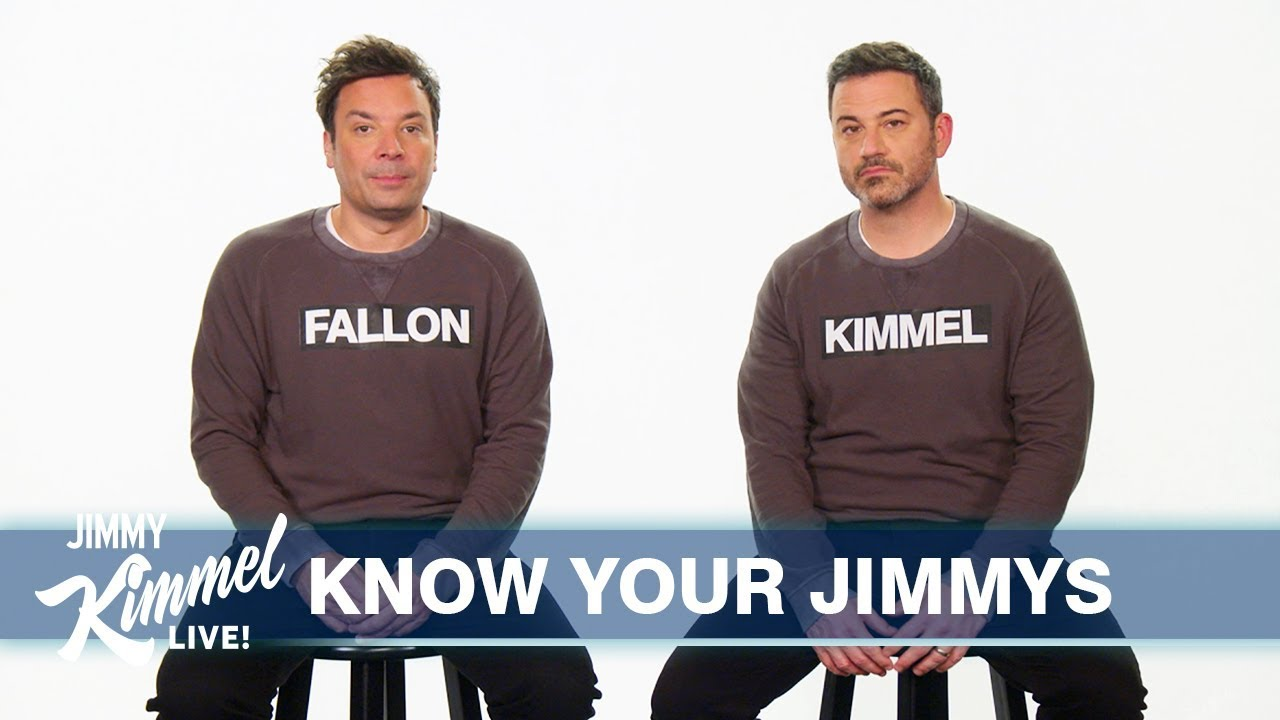

In [4]:
from IPython import display
display.Image("https://i.ytimg.com/vi/nyf7wNn5fw8/maxresdefault.jpg")

#### Category ID

Uočimo da je `category_id` diskretna varijabla koja moze poprimiti vrijednosti od 1 do 43. Napišimo funkciju koja crta stupčasti dijagram za `category_id`.

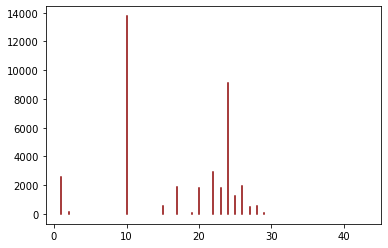

In [5]:
import matplotlib.pyplot as plt

def barplot(podaci):
    frekvencije_kategorija = []
    for i in range (0,43): frekvencije_kategorija.append(0) #inicijaliziramo listu u koju ćemo spremiti podatke
    for i in range (0,43): frekvencije_kategorija[i] = sum(podaci['category_id'] == i+1) #bilježimo frekvencije
    for i in range (0,43): plt.plot([i+1,i+1],[0,frekvencije_kategorija[i]],color='darkred')
        
barplot(podaciGB)

Iz dijagrama vidimo da je najzastupljenija kategorija na Trending pageu $10$, a ona zapravo predstavlja 'Music'. Do sada nismo spominjali glazbu kao popularnu kategoriju, no to je sasvim logično jer nije uobičajeno očekivati da će samo par izvođača biti popularno (svaki ima svoj kanal).

Druga najpopularnija kategorija je $24$. Kao što je i prije bilo rečeno, i nekako očekivano, ona predstavlja 'Entertainment' u što spadaju Late Night i Talk Shows.

Prije nego krenemo dalje, definirajmo klasu koja će nam omogućavati printanje teksta u drugim [bojama](https://stackoverflow.com/questions/287871/how-to-print-colored-text-to-the-terminal).

In [6]:
import os

os.system("")

class style():
    RED = '\033[31m'
    GREEN = '\033[32m'
    YELLOW = '\033[33m'
    BLUE = '\033[34m'
    MAGENTA = '\033[35m'
    RESET = '\033[0m'

print(style.YELLOW + f"Ovako će izgledati obojano.", style.RESET + f"Ovako vraćamo na zadanu boju.")

Ovako će izgledati obojano. Ovako vraćamo na zadanu boju.


Nađimo aritmetičku sredinu broja viewova, likeova, i dislikeova za kategoriju koja nas zanima. Za to ćemo napraviti funkciju koja će primati `DataFrame`, `string` i `int` kao argumente. Za dani `DataFrame` tražimo retke (videe) koji spadaju u danu kategoriju i vraća aritmetičku sredinu za zadani `string` (u našem slučaju je to `Series` iz `DataFrame`). Pogledajmo ispis u nastavku da bude jasnije što sama funkcija radi.

In [7]:
def ukupno(podaci,string,kategorija):
    suma = sum(podaci.loc[podaci['category_id'] == kategorija, string])
    broj_podataka = len(podaci.loc[podaci['category_id'] == kategorija, string])
    prosjek = suma/broj_podataka
    return prosjek

print(f"U prosjeku, glazbeni sadržaj na Tranding pageu ima ", style.BLUE + f"{ukupno(podaciGB,'views',10)} ",style.RESET + f"viewova po videu, dok entertainment videi imaju u prosjeku ", style.GREEN + f"{ukupno(podaciGB,'views',24)}", style.RESET + "viewova.\n")
print(f"U prosjeku, glazbeni sadržaj na Tranding pageu ima ", style.BLUE + f"{ukupno(podaciGB,'likes',10)} ",style.RESET + f"likeova po videu, dok entertainment videi imaju u prosjeku ", style.GREEN + f"{ukupno(podaciGB,'likes',24)}", style.RESET + "likeova.\n")
print(f"U prosjeku, glazbeni sadržaj na Tranding pageu ima ", style.BLUE + f"{ukupno(podaciGB,'dislikes',10)} ",style.RESET + f"dislikeova po videu, dok entertainment videi imaju u prosjeku ", style.GREEN + f"{ukupno(podaciGB,'dislikes',24)}", style.RESET + "dislikeova.\n")
print(f"U prosjeku, glazbeni sadržaj na Tranding pageu ima ", style.BLUE + f"{ukupno(podaciGB,'comment_count',10)} ",style.RESET + f"komentara po videu, dok entertainment videi imaju u prosjeku ", style.GREEN + f"{ukupno(podaciGB,'comment_count',24)}", style.RESET + "komentara.\n")

U prosjeku, glazbeni sadržaj na Tranding pageu ima  12444442.690780863  viewova po videu, dok entertainment videi imaju u prosjeku  3264607.9615300307 viewova.

U prosjeku, glazbeni sadržaj na Tranding pageu ima  272138.50894285296  likeova po videu, dok entertainment videi imaju u prosjeku  81572.36201227532 likeova.

U prosjeku, glazbeni sadržaj na Tranding pageu ima  11587.191798749454  dislikeova po videu, dok entertainment videi imaju u prosjeku  9656.52685225778 dislikeova.

U prosjeku, glazbeni sadržaj na Tranding pageu ima  21303.849062091027  komentara po videu, dok entertainment videi imaju u prosjeku  12812.082419991231 komentara.



Glazbeni sadržaj u prosjeku ima više viewova, likeova i komentara. Razlika u broju dislikeova između glazbenog sadržaja i entertaintmenta nije toliko značajna. Javlja se prirodno pitanje postoji li korelacija izmedu ovih varijabli?

#### Correlations

U `Correlations` dijelu gornje analize, vidimo da najveći (Pearsonovi) koeficijenti korelacije su između `likes` i `comment_count`, `likes` i `views`, i između `dislikes` i `comment_count`.

Ne bi nas trebalo iznenaditi to što izgleda da `category_id` nije u jakoj korelaciji ni sa jednom drugom kategorijom pošto on predstavlja *tip* videa.

Nacrtajmo takozvanu `scatter matrix`. Ona će nam dati, u našem slučaju, $4\times 4$ matricu koja kao $(n,m)$-ti član sadrži koordinatni sustav na kojem su prikazani uređeni parovi iz danog `Dataframea` iz stupaca $n$ i $m$. 

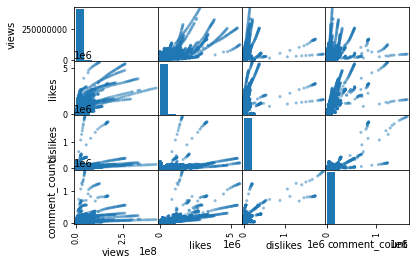

In [114]:
from pandas.plotting import scatter_matrix
scatter_matrix(podaciGB[['views','likes','dislikes', 'comment_count']])
plt.show()

Izdvojimo jedan od gornjih grafova, na primjer, prikažimo uređene parove (`views`,`likes`).

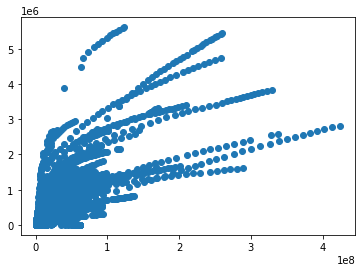

In [12]:
plt.plot(podaciGB['views'],podaciGB['likes'], 'o')
plt.show()

Vidimo iz gornjeg grafa (isto tako i iz ostalih grafova iz scatter matrice), da postoji neki uzorak, no definitivno nije samo jedan. Možda bismo mogli upisati više logaritamskih funkcija koje bi opisivale gornju vezu, no samo jednu krivulju ne bismo mogli izdvojiti.

Postoji li neka pravilnija veza ako izdvojimo kategorije? Nacrtajmo uređene parove (`views`,`likes`), ali za kategoriju $10$ i kategoriju $24$ odvojeno. Prisjetimo se da $10$ predstavlja glazbeni sadržaj, dok $24$ predstavlja entertaintment.

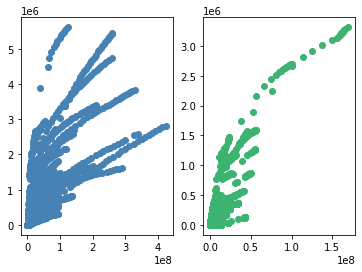

In [15]:
fig, (kat10, kat24) = plt.subplots(1,2)
kat10.plot(podaciGB.loc[podaciGB['category_id'] == 10, 'views'],podaciGB.loc[podaciGB['category_id'] == 10, 'likes'], 'o',color = "steelblue")
kat24.plot(podaciGB.loc[podaciGB['category_id'] == 24, 'views'],podaciGB.loc[podaciGB['category_id'] == 24, 'likes'], 'o', color = "mediumseagreen")
plt.show()

Gornji grafovi slijede isti uzorak kao i nerestringirani graf tako da ne možemo donijeti previše zaključaka na temelju njih.

## Analiza trendova u Indiji i Francuskoj

Ponovimo gornju analizu i za Indiju i Francusku. Nećemo raditi toliko detaljnu analizu jer je postupak analogan.

### Indija

In [17]:
podaciIN = pd.read_csv('INvideos.csv', encoding = 'utf-8')
podaciIN.drop(['video_id', 'title', 'publish_time', 'tags','thumbnail_link', 'comments_disabled','ratings_disabled','video_error_or_removed','description'],axis=1,inplace=True)
podaciIN.head()

,trending_date,channel_title,category_id,views,likes,dislikes,comment_count
0,17.14.11,Lokdhun Punjabi,1,1096327,33966,798,882
1,17.14.11,HJ NEWS,25,590101,735,904,0
2,17.14.11,TFPC,24,473988,2011,243,149
3,17.14.11,Eruma Saani,23,1242680,70353,1624,2684
4,17.14.11,Filmylooks,24,464015,492,293,66


### Francuska

In [18]:
podaciFR = pd.read_csv('FRvideos.csv', encoding = 'utf-8')
podaciFR.drop(['video_id', 'title', 'publish_time', 'tags','thumbnail_link', 'comments_disabled','ratings_disabled','video_error_or_removed','description'],axis=1,inplace=True)
podaciFR.head()

,trending_date,channel_title,category_id,views,likes,dislikes,comment_count
0,17.14.11,Le Raptor Dissident,24,212702,29282,1108,3817
1,17.14.11,Le Labo,24,432721,14053,576,1161
2,17.14.11,Daniil le Russe,23,482153,76203,477,9580
3,17.14.11,Joueur Du Grenier,20,925222,85016,550,4303
4,17.14.11,Aurelien Fontenoy,17,141695,8091,72,481


Vidimo po ulaznim podacima da se videi razlikuju od države do države. Odmah uočavamo da bi lako mogli zaključiti o kojoj se državi radi s obzirom na `title` videa.

## PewDiePie vs. T-Series

Na početku smo spomenuli poznatu *borbu* između dva kanala, PewDiePie i T-Series. PewDiePie je imao titulu kanala s najviše pretplatnika gotovo pet godina! Godine 2018., T-Series se opasno počeo približavati po broju pretplatnika. T-Series je kanal kojeg vodi istoimena indijska diskografska kuća.

Podaci koje imamo su iz 2017. i 2018. godine, odnosno podaci uoči službenog početka borbe. Proučavat ćemo postoji li ikakva korelacija podataka pojedinog kanala.

#### O samoj promociji borbe

Kada se T-Series počeo približavati PewDiePie-u po broju pretplatnika, krenula je sama promocija i poticanje na pretplaćivanje na PewDiePie-jev kanal. Zašto je toliko ljudi bilo na njegovoj strani? Jedan od važnih faktora bilo je to što je on bio jedna osoba koja je vodila cijeli kanal, dok je T-Series velika firma.

PewDiePie-jevi fanovi su promovirali "Subscribe to PewDiePie" na mnogo zanimljivih načina. Osim klasičnih objava na društvenim mrežama, hakirali su printere, web stranice, plaćali plakate na raznim mjestima, čak su se pojavljivali i na radio emisijama. Najznačajnija hakerska akcija je bila objava na Wall Street Journalu u kojoj je napisana lažna isprika PewDiePie-u. Zašto je toliko značajna? Zato što su u prošlosti pisali puno članaka protiv njega.

Može se lako pretpostaviti da će takvo nešto, što je počelo kao šala, završiti u nekim ekstremima.

PewDiePie je objavio *diss track* kojeg je T-Series optužio da promovira *anti Indija* kulturu. Potkrijepili su svoju tvrdnju porukama i objavama fanova koji su cijelu promociju shvatili preozbiljno. Unatoč molbama spomenutog YouTubera, takve stvari je nemoguće izbjeći kada je skupina njegovih pratitelja toliko velika.

Jedan od najtragičnijih događaja također je povezan ovom promocijom. Pucnjava u Christchurchu 2019. godine u Novom Zelandu o kojoj nećemo pisati, no više o tom događaju možete pročitati [ovdje](https://www.rollingstone.com/culture/culture-news/pewdie-pie-new-zealand-mosque-shooting-youtube-808633/). Ubojica je izrekao "Subscribe to PewDiePie" i tim događajem završio je cijeli pokret vezan za tu izjavu.

### Korelacija podataka

Provjerimo koliko puta su se spomenuti kanali pojavili na Tranding pageu u pojedinoj državi.

In [125]:
print(f"U Velikoj Britaniji, PewDiePie se pojavio {sum(podaciGB['channel_title']=='PewDiePie')} puta na Trending pageu, a T-Series {sum(podaciGB['channel_title']=='T-Series')} puta.\n")
print(f"U Indiji, PewDiePie se pojavio {sum(podaciIN['channel_title']=='PewDiePie')} puta na Trending pageu, a T-Series {sum(podaciIN['channel_title']=='T-Series')} puta.\n")
print(f"U Francuskoj, PewDiePie se pojavio {sum(podaciFR['channel_title']=='PewDiePie')} puta na Trending pageu, a T-Series {sum(podaciFR['channel_title']=='T-Series')} puta.\n")

U Velikoj Britaniji, PewDiePie se pojavio 152 puta na Trending pageu, a T-Series 0 puta.

U Indiji, PewDiePie se pojavio 85 puta na Trending pageu, a T-Series 221 puta.

U Francuskoj, PewDiePie se pojavio 71 puta na Trending pageu, a T-Series 7 puta.



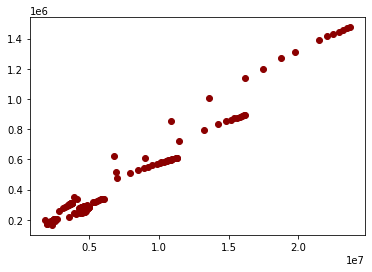

In [120]:
import numpy as np
podaciGB.loc[podaciGB['channel_title'] == 'PewDiePie','views']
xGB = podaciGB.loc[podaciGB['channel_title'] == 'PewDiePie','views']
yGB = podaciGB.loc[podaciGB['channel_title'] == 'PewDiePie','likes']
plt.plot(xGB, yGB, 'o', color= "darkred")
plt.show()

Definirajmo funkciju koja ce nam izbaciti koeficijente linearne regresije. Radimo je po [modelu](https://web.math.pmf.unizg.hr/nastava/statpr/files/linearna.pdf) s vježbi kolegija Statistički praktikum 1, no prvo implementirajmo funkciju koja ce vraćati transponiranu matricu.

In [114]:
def transponiraj(A):
    
    broj_redaka = len(A[:,0])
    broj_stupaca = len(A[0,:])
    
    A_transponirana = np.zeros((broj_stupaca,broj_redaka))
    
    for i in range (broj_redaka):
        for j in range (broj_stupaca):
            A_transponirana[j][i] = A[i][j]
    
    return A_transponirana     

Napišimo sada i funkciju koja vraća koeficijente linearnog modela, $\theta_1$ i $\theta_2$, takve da vrijedi:

$$y=\theta_1+\theta_2 x$$

za ulazne vrijednosti $x$ i $y$.

In [115]:
from numpy.linalg import inv #potrebno za invertiranje matrice

def linearna_regresija(podacix,podaciy):
    
    n = len(podacix) #broj redaka, broj stupaca = 2
    X = [[1 for i in range (2)] for j in range (n)] #svi članovi matrice postavljeni na 1
    
    for i in range (n): X[i][1] = podacix.tolist()[i]
        
    y = podaciy.array
    
    theta = inv(transponiraj(np.array(X)) @ X) @ transponiraj(np.array(X)) @ y
    
    print(theta)
    
print(linearna_regresija(xGB,yGB))

<PandasArray>
[25067.18406182765, 0.05970884529878348]
Length: 2, dtype: float64
None


0.05970884529878266 25067.1840618332


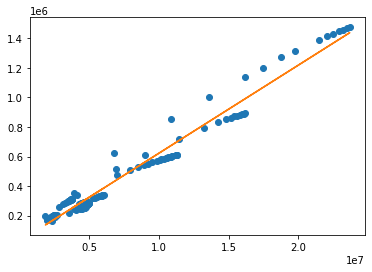

In [113]:
plt.plot(xGB, yGB, 'o')
kGB, lGB= np.polyfit(xGB, yGB, 1)
print(kGB,lGB)
plt.plot(xGB, kGB*xGB + lGB)

In [16]:
podaciFR.loc[podaciFR['channel_title'] == 'PewDiePie','views']
xFR = podaciFR.loc[podaciFR['channel_title'] == 'PewDiePie','views']
yFR = podaciFR.loc[podaciFR['channel_title'] == 'PewDiePie','likes']
plt.plot(xFR,yFR, 'o')
plt.show()

NameError: name 'podaciFR' is not defined

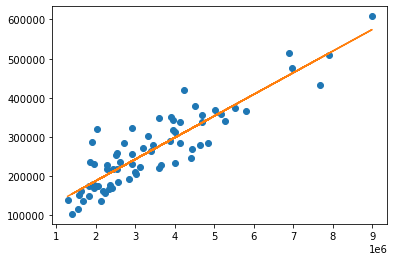

In [26]:
plt.plot(xFR, yFR, 'o')
kFR, lFR= np.polyfit(xFR, yFR, 1)
plt.plot(xFR, kFR*xFR + lFR)

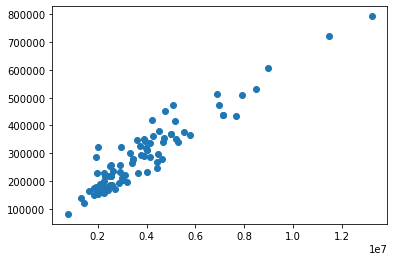

In [27]:
podaciIN.loc[podaciIN['channel_title'] == 'PewDiePie','views']
xIN = podaciIN.loc[podaciIN['channel_title'] == 'PewDiePie','views']
yIN = podaciIN.loc[podaciIN['channel_title'] == 'PewDiePie','likes']
plt.plot(xIN,yIN, 'o')

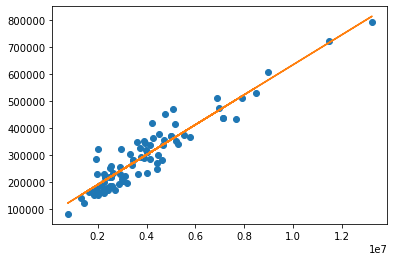

In [28]:
plt.plot(xIN, yIN, 'o')
kIN, lIN= np.polyfit(xIN, yIN, 1)
plt.plot(xIN, kIN*xIN + lIN)

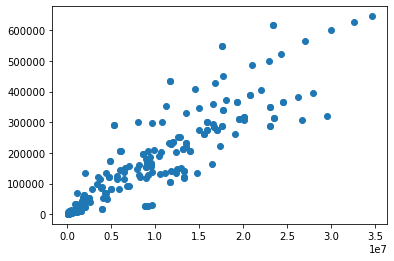

In [29]:
podaciIN.loc[podaciIN['channel_title'] == 'T-Series','views']
x = podaciIN.loc[podaciIN['channel_title'] == 'T-Series','views']
y = podaciIN.loc[podaciIN['channel_title'] == 'T-Series','likes']
plt.plot(x,y, 'o')

# Literatura

https://www.kaggle.com/datasnaek/youtube-new

https://gist.github.com/dgp/1b24bf2961521bd75d6c

https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3

https://stackoverflow.com/questions/287871/how-to-print-colored-text-to-the-terminal

https://web.math.pmf.unizg.hr/nastava/statpr/files/linearna.pdf

https://tech.hindustantimes.com/tech/news/pewdiepie-vs-t-series-looking-back-at-the-epic-battle-for-youtube-supremacy-story-q8J0VhkuIbrVLGeWfcqcHP.html

https://www.rollingstone.com/culture/culture-news/pewdie-pie-new-zealand-mosque-shooting-youtube-808633/